In [2]:
import numpy as np
import pandas as pd

# Load data into memory
data = pd.read_csv('train.csv')

# Inspect the data
print(f"Shape of the data: {data.shape}")
# print("")
# print(data.head())

# Convert data into a matrix
data = np.array(data)


X = data[:, 1:]
X = X.T
Y = data[:, 0]

print(X.shape, Y.shape)

Shape of the data: (42000, 785)
(784, 42000) (42000,)


In [3]:
def split_data(X, Y):
    d, N = X.shape
    N_train = int(N * 0.8)
    print(f"Length of training set = {N_train}")

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:, train_idx]
    Y_train = Y[train_idx]
    
    X_test = X[:, test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

In [4]:
# Filter out training set and randomly sample a training set
number1 = 0
number2 = 6
number3 = 9

filterNums = (Y==number1) | (Y==number2) | (Y==number3)

XfilterDigits = X[:, filterNums]
YfilterDigits = Y[filterNums]

(X_train, Y_train), (X_test, Y_test) = split_data(XfilterDigits, YfilterDigits)

dx1, Nx1 = X_test.shape
print(f'Length of testing set = {X_test.shape}')

# Call X1 and X2 the submatrices of the training set
C1 = Y_train[Y_train==number1]
C2 = Y_train[Y_train==number2]
C3 = Y_train[Y_train==number3]


X1 = X_train[:, Y_train == number1]
X2 = X_train[:, Y_train == number2]
X3 = X_train[:, Y_train == number3]

Length of training set = 9965
Length of testing set = (784, 2492)


In [5]:
# Implement the algorithms computing the PCA of X_train with a fixed value of k

cX = np.mean(X_train, axis=1)

# Make it a column vector
cX = np.reshape(cX, (dx1, 1))
print(cX.shape)

# Center the data
Xc = X_train - cX

# Compute SVD decomposition
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

# Given k, compute reduced SVD
k = 5
Uk = U[:, :k]

# Define projection matrix
P = Uk.T

# Project X_train -> Z_train
Z_train = P @ X_train
print(Z_train.shape)

l, m = Z_train.shape

Z1 = Z_train[:, Y_train == number1]
Z2 = Z_train[:, Y_train == number2]
Z3 = Z_train[:, Y_train == number3]

cZ1 = np.mean(Z1, axis=1)
cZ2 = np.mean(Z2, axis=1)
cZ3 = np.mean(Z3, axis=1)

(784, 1)
(5, 9965)


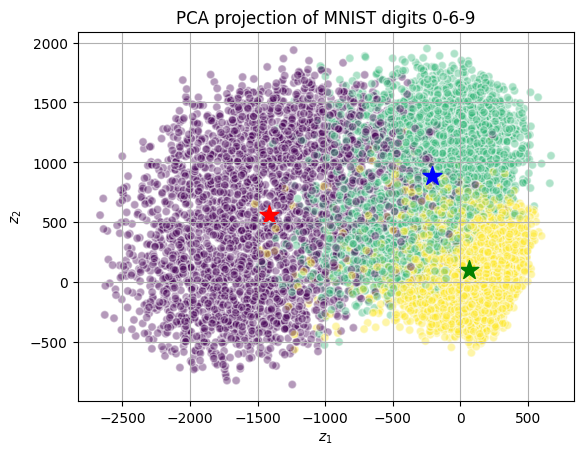

In [6]:
# Visualize the results and the position of the centroid of each cluster
import matplotlib.pyplot as plt

plt.scatter(Z_train[0, :], Z_train[1, :], c=Y_train, alpha=0.4, edgecolors='w')
plt.scatter(cZ1[0], cZ1[1], c='red', marker='*', s=200, label=f'{number1}')
plt.scatter(cZ2[0], cZ2[1], c='blue', marker='*', s=200, label=f'{number2}')
plt.scatter(cZ3[0], cZ3[1], c='green', marker='*', s=200, label=f'{number3}')
plt.title("PCA projection of MNIST digits 0-6-9")
plt.grid()
plt.show()

In [7]:
# Compute, for each cluster, the average distance from its centroid
d1 = np.mean(np.linalg.norm(Z1 - cZ1.reshape(-1, 1), axis=0))
d2 = np.mean(np.linalg.norm(Z2 - cZ2.reshape(-1, 1), axis=0))
d3 = np.mean(np.linalg.norm(Z3 - cZ3.reshape(-1, 1), axis=0))
print(f'The distance are following \nZ1 = {d1} \nZ2 = {d2} \nZ3 = {d3}')

The distance are following 
Z1 = 1088.7857455369417 
Z2 = 900.712555230225 
Z3 = 664.4050481030135


It is telling us how spread out the cluster is from the centroid

(5, 2492)


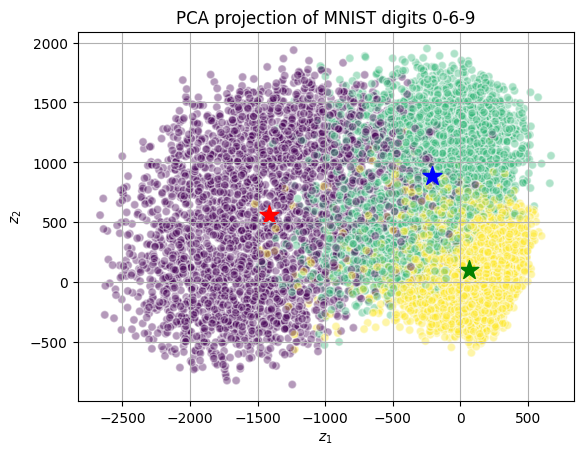

In [8]:
# By keeping the same projection matrix P from the train set, project the test set X_test on the low-dimensional space
XcTest = X_test - cX

Z_test = P @ XcTest
print(Z_test.shape)

plt.scatter(Z_train[0, :], Z_train[1, :], c=Y_train, alpha=0.4, edgecolors='w')
plt.scatter(cZ1[0], cZ1[1], c='red', marker='*', s=200, label=f'{number1}')
plt.scatter(cZ2[0], cZ2[1], c='blue', marker='*', s=200, label=f'{number2}')
plt.scatter(cZ3[0], cZ3[1], c='green', marker='*', s=200, label=f'{number3}')
plt.title("PCA projection of MNIST digits 0-6-9")
plt.grid()
plt.show()

In [9]:
Ztest1 = Z_test[:, Y_test == number1]
Ztest2 = Z_test[:, Y_test == number2]
Ztest3 = Z_test[:, Y_test == number3] 

# For each cluster in the test set, compute the average distance to the corresponding centroid (from the train set)
dtest1 = np.mean(np.linalg.norm(Ztest1 - cZ1.reshape(-1, 1), axis=0))
dtest2 = np.mean(np.linalg.norm(Ztest2 - cZ2.reshape(-1, 1), axis=0))
dtest3 = np.mean(np.linalg.norm(Ztest3 - cZ3.reshape(-1, 1), axis=0))

print(f'Distance from centriod of train set for test digits, \ndigit {number1} = {dtest1}, \ndigit {number2} = {dtest2}, \ndigit {number3} = {dtest3}')

Distance from centriod of train set for test digits, 
digit 0 = 1799.2952982726815, 
digit 6 = 1666.8593266787714, 
digit 9 = 1589.3838445579172


The distance has increased significantly for all digits in the test

In [10]:
# Define a classification algorithm in this way: given a new observation x, compute the distance between x and each cluster centroid computed on the training set. Assign x to the class corresponding the the closer centroid. Compute the misclassification rate of this algorithm on the test set

testRandomValues = np.arange(1,Nx1,20)
misclassification = 0

for x in testRandomValues:
    x_inst = X_test[:,x]
    y_inst = Y_test[x]
    # cXTest = np.mean(x_inst, axis=1)

    # Make it a column vector
    # cXTest = np.reshape(cXTest, (d, 1))

    # # Center the data
    # XcTest = x_inst - cX

    # Project X_test -> Z_test
    Z_test = P @ XcTest
    
    Ztest1 = Z_test[:,  Y_test == number1]
    Ztest2 = Z_test[:,  Y_test == number2]
    Ztest3 = Z_test[:,  Y_test == number3] 

    dist1 = np.mean(np.linalg.norm(Ztest1 - cZ1.reshape(-1, 1), axis=0))
    dist2 = np.mean(np.linalg.norm(Ztest2 - cZ2.reshape(-1, 1), axis=0))
    dist3 = np.mean(np.linalg.norm(Ztest3 - cZ3.reshape(-1, 1), axis=0))

    if dist1 < dist2 and dist1 < dist3:
            y_pred = number1
    elif dist2 < dist1 and dist2 < dist3:
            y_pred = number2
    else:
            y_pred = number3

    if y_pred != y_inst:
        misclassification += 1


print(f'Total misclassification rate = {misclassification / len(testRandomValues)}')

Total misclassification rate = 0.624


In [11]:

# Choose which three different digits
number1, number2, number3 = 0, 1, 5

filterNums = (Y == number1) | (Y == number2) | (Y == number3)
X_filtered = X[:, filterNums]
Y_filtered = Y[filterNums]

(X_train, Y_train), (X_test, Y_test) = split_data(X_filtered, Y_filtered)

# Compute the mean
d, N_train = X_train.shape
cX = np.mean(X_train, axis=1)
cX = np.reshape(cX,(d,1))

# Center training data
Xc = X_train - cX

# some k values
k_values = [2, 4]
misclassification_rates = []

for k in k_values:
    
    U, s, Vt = np.linalg.svd(Xc, full_matrices=False)
    Uk = U[:, :k]
    P = Uk.T

    Z_train = P @ X_train

    q, m = Z_train.shape


    Z1 = Z_train[:, Y_train==number1]
    Z2 = Z_train[:, Y_train == number2]
    Z3 = Z_train[:, Y_train == number3]

    cZ1 = np.mean(Z1, axis=1)
    cZ2 = np.mean(Z2, axis=1)
    cZ3 = np.mean(Z3, axis=1)

    cZ1 = np.reshape(cZ1, (k, 1))
    cZ2 = np.reshape(cZ2, (k, 1))
    cZ3 = np.reshape(cZ3, (k, 1))

    # plt.scatter(Z_train[0, :], Z_train[1, :], c=Y_train, cmap='viridis', alpha=0.6, edgecolors='w', s=30)

    # # # Add centroids to the plot
    # # plt.scatter(cZ1[0], cZ1[1], c='red', marker='*', s=200, label=f'Centroid {number1}')
    # # plt.scatter(cZ2[0], cZ2[1], c='blue', marker='*', s=200, label=f'Centroid {number2}')
    # # plt.scatter(cZ3[0], cZ3[1], c='green', marker='*', s=200, label=f'Centroid {number3}')

    # # # Add legend and labels
    # # plt.legend(loc='best', title="Digit Clusters and Centroids")
    # # plt.xlabel(r"$z_1$")
    # # plt.ylabel(r"$z_2$")
    # # plt.title("PCA Projection of MNIST Selected Digits with Centroids")
    # # plt.grid()
    # # plt.show()

    # Center test data
    l, N_test = X_test.shape
    misclassified = 0

    for i in range(N_test):
        x_test = X_test[:, i]
        y_test = Y_test[i]
        
        z_test = P @ x_test

        dist1 = np.mean(np.linalg.norm(z_test - cZ1.reshape(-1, 1), axis=0))
        dist2 = np.mean(np.linalg.norm(z_test - cZ2.reshape(-1, 1), axis=0))
        dist3 = np.mean(np.linalg.norm(z_test - cZ3.reshape(-1, 1), axis=0))

        if dist1 < dist2 and dist1 < dist3:
            y_pred = number1
        elif dist2 < dist1 and dist2 < dist3:
            y_pred = number2
        else:
            y_pred = number3

        if y_pred != y_test:
            misclassified += 1

    rate = misclassified / N_test
    misclassification_rates.append(rate)
    print(f"k={k}: Misclassification rate = {rate:.4f}")

Length of training set = 10088
k=2: Misclassification rate = 0.5644
k=4: Misclassification rate = 0.6433


When the value for k is small then the program can be high but it reaches a plateau very quickly